<font size=8 face="courier" color="blue">Indra Test</font>

In this notebook we run our first initial tests of [Indra](https://indra.readthedocs.io/en/latest/)

### Resources :

* [Indra Documentation](https://indra.readthedocs.io/en/latest/)
* [Academic Article](http://msb.embopress.org/content/msb/13/11/954.full.pdf)

# Setup Notebook
Download essential python packages. Setup notebook view and environmental variables.

In [1]:
from IPython.core.display import HTML, display
# to reverse this feature restart kernel with "restart and clear output"
display(HTML("<style> *{margin:0; padding:0;} html, body, \
             .container{margin:0;!important padding:0;!important} \
             .container { width:100% !important;}</style>"))

For this code to work we must install the java environment as follows:

In [2]:
%env JAVA_HOME=/usr/lib/jvm/java-8-openjdk-amd64

env: JAVA_HOME=/usr/lib/jvm/java-8-openjdk-amd64


Import essential python packages

In [3]:
import sys
import numpy as np
from pprint import pprint
import inspect

Import essential jupyter packages

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

Import Indra Modules

In [5]:
sys.path.append("/root/Documents/indra")
from indra.sources import biopax
from indra.sources import trips
from indra import assemblers
from indra.assemblers import cx_assembler

In [6]:
import ndex2

# Example from Paper
Here we test the example from this [Academic Article](http://msb.embopress.org/content/msb/13/11/954.full.pdf)

In [7]:
# parse text description into indra statements
text = 'MEK1 phosphorylates ERK2 at threonine 185 and tyrosine 187'
trips_processor = trips.process_text(text)
statements = trips_processor.statements
statements

[Phosphorylation(MAP2K1(), MAPK1(), T, 185),
 Phosphorylation(MAP2K1(), MAPK1(), Y, 187)]

In [8]:
# Assemble statements into executable model
pa = assemblers.PysbAssembler()
pa.add_statements(statements)
model = pa.make_model(policies='two_step')

INFO: [2018-05-31 19:17:59] indra/pysb_assembler - Running PySB Preassembler replace activities


<font color="magenta">sigh... I guess I need to instal [BioNetGen](http://www.csb.pitt.edu/Faculty/Faeder/?page_id=409) to simulate]</font>

In [9]:
# simulate model
time = np.linspace(0,300)
sim_result = odesolve(model, time)

#plt.plot(tspan, y['substrate'], label="substrate")
#plt.plot(tspan, y['e_total'], label="e_total")
#plt.plot(tspan, y['e_free'], label="e_free")
#plt.plot(tspan, y['product'], label="product")
#plt.plot(tspan, y['complex'], label="complex")
#plt.xlabel('time')
#plt.ylabel('population')
#plt.ylim(0,110)
#plt.legend(loc=0)
#plt.show()

NameError: name 'odesolve' is not defined

# QuickStart BioPax Example
This notebook runs the basic [getting started](https://indra.readthedocs.io/en/latest/getting_started.html) example of the biopax module.

Here is the example code

In [10]:
proteins = ['BRAF', 'MAPK3']
limit = 2
biopax_processor = biopax.process_pc_pathsbetween(proteins, limit)

INFO: [2018-05-31 19:18:20] indra/biopax - Sending Pathway Commons query with parameters: 
INFO: [2018-05-31 19:18:20] indra/biopax -  datasource: ['wp', 'smpdb', 'reconx', 'reactome', 'psp', 'pid', 'panther', 'netpath', 'msigdb', 'mirtarbase', 'kegg', 'intact', 'inoh', 'humancyc', 'hprd', 'drugbank', 'dip', 'corum']
INFO: [2018-05-31 19:18:20] indra/biopax -  source: BRAF,MAPK3
INFO: [2018-05-31 19:18:20] indra/biopax -  organism: 9606
INFO: [2018-05-31 19:18:20] indra/biopax -  limit: 2
INFO: [2018-05-31 19:18:20] indra/biopax -  format: BIOPAX
INFO: [2018-05-31 19:18:20] indra/biopax -  kind: pathsbetween
INFO: [2018-05-31 19:18:20] indra/biopax - Sending Pathway Commons query...
INFO: [2018-05-31 19:18:23] indra/biopax - Pathway Commons query returned a model...


We see that the output is indra statements.

In [11]:
biopax_processor.statements

[Dephosphorylation(DUSP6(), MAPK3(), T, 201),
 Dephosphorylation(DUSP6(), MAPK3(), Y, 203),
 Dephosphorylation(DUSP6(), MAPK3(), T, 201),
 Dephosphorylation(DUSP6(), MAPK3(), Y, 203),
 Dephosphorylation(DUSP6(), MAPK1(), Y, 184),
 Dephosphorylation(DUSP6(), MAPK1(), T, 182),
 Dephosphorylation(DUSP1(), MAPK3(), T, 201),
 Dephosphorylation(DUSP1(), MAPK3(), Y, 203),
 Dephosphorylation(DUSP1(), MAPK3(), T, 201),
 Dephosphorylation(DUSP1(), MAPK3(), Y, 203),
 Dephosphorylation(DUSP1(), MAPK1(), Y, 184),
 Dephosphorylation(DUSP1(), MAPK1(), T, 182),
 Phosphorylation(ARAF(), MAP2K2()),
 Phosphorylation(ARAF(), MAP2K1()),
 Phosphorylation(BRAF(), MAP2K2()),
 Phosphorylation(BRAF(), MAP2K1()),
 Phosphorylation(RAF1(), MAP2K2()),
 Phosphorylation(RAF1(), MAP2K1()),
 Phosphorylation(BRAF(), MAP2K2(), S, 226),
 Phosphorylation(BRAF(), MAP2K2(), S, 222),
 Phosphorylation(BRAF(), MAP2K1(), S, 222),
 Phosphorylation(BRAF(), MAP2K1(), S, 218),
 Phosphorylation(BRAF(), MAP2K1(), S, 222),
 Phosphoryla

# EGFR File Example 
This example relates to [this network](http://www.ndexbio.org/#/network/d4563605-6191-11e5-8ac5-06603eb7f303). NOtice this example uses `get_complexes` to extract more info from the [OWL file](http://indra.akintunde.org/edit/Documents/data/EGFR-dependent-Endothelin-signaling-events.owl). This [google doc](https://docs.google.com/document/d/1wNgRsnPChnNRN_DqsKftm_6MrOYse0GaxaXN9aQl12E/edit#heading=h.6mg7ysp92r3w) also talks about this example.

In [12]:
biopax_processor = biopax.biopax_api.process_owl("data/EGFR-dependent-Endothelin-signaling-events.owl")

Since complexes are not extracted by default (they can be intractable for large networks), here we extract them explicitly

In [13]:
biopax_processor.get_complexes()

In [14]:
for idx, stmt in enumerate(biopax_processor.statements):
    print(idx, stmt)

0 ActiveForm(MTOR(mods: (phosphorylation, S, 2448)), activity, True)
1 Complex(EGF(), EGFR())
2 Complex(GRB2(), SOS1())
3 Complex(GTP(), HRAS())
4 Complex(EDN1(), EDNRA())
5 Complex(GDP(), HRAS())
6 Complex(EGF(), EGF(), EGFR(mods: (phosphorylation, Y)), EGFR(mods: (phosphorylation, Y)), SHC1(mods: (phosphorylation, Y, 240), (phosphorylation, Y, 239), (phosphorylation, Y, 317)))
7 Complex(EGF(), EGF(), EGFR(mods: (phosphorylation, Y)), EGFR(mods: (phosphorylation, Y)))
8 Complex(GRB2(), EGF(), EGF(), SOS1(), EGFR(mods: (phosphorylation, Y)), EGFR(mods: (phosphorylation, Y)), SHC1(mods: (phosphorylation, Y, 240), (phosphorylation, Y, 239), (phosphorylation, Y, 317)))


## Ben's  Description <font color="green">(really good!)</font>
A useful ChiBe visualization of reaction network and explanation of data extraction process

Below is the ChiBE visualization of the reaction network.

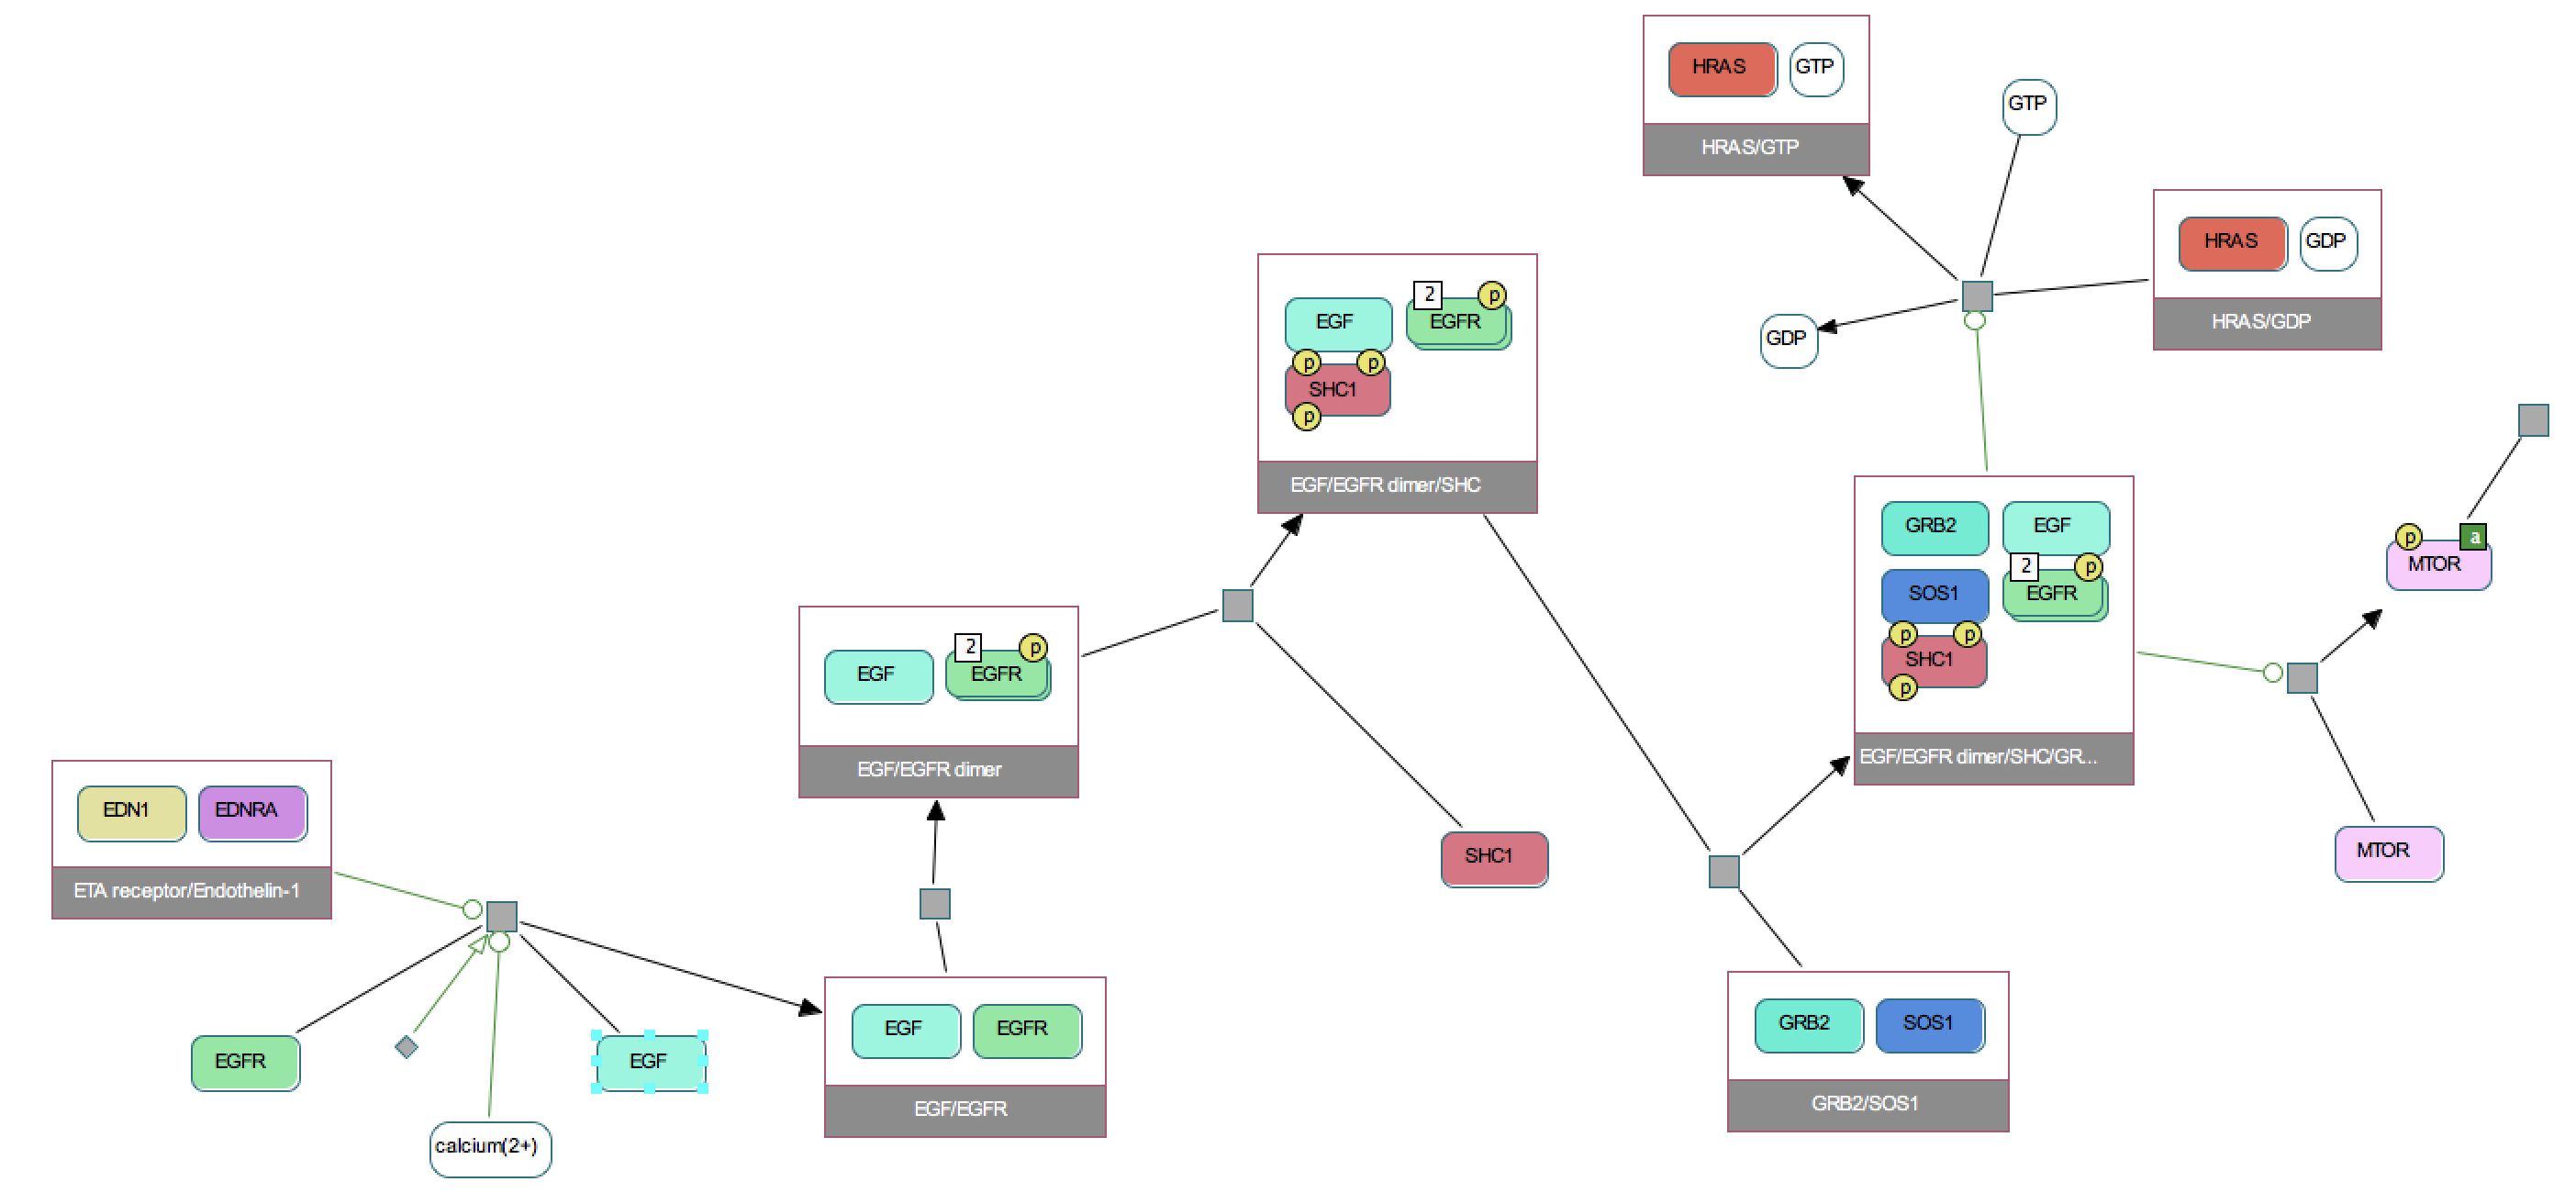

Issues
- The phosphorylation of MTOR is controlled by a "giant" complex consisting of EGF, two copies of phosphorylated EGFR, GRB2, SOS1 and phosphorylated SHC1. While INDRA has various heuristics for figuring out which member of a complex does the phosphorylation, in this case there are no clues to go by. Therefore we don't pick up the phosphorylation reaction.
- The same is true for HRAS: we can normally extract this reaction pattern as a `Gef` Statement but due to the complex controller, we don't.
- Both of the above could be resolved by adding an extraction "policy" to `indra.sources.biopax.BiopaxProcessor` which picks up complex controllers by designating an arbitrary member as the main Agent and adding other members as `bound_condition`s on the main Agent.

# CX Example
Here we turn the list of indra statements from the previous example <font color="blue">4 EGFR File Example</font> into [a .cx file](http://indra.akintunde.org/edit/Documents/model.cx) and then we [upload it to NDEX](http://ndexbio.org/#/network/567ee251-5864-11e8-a4bf-0ac135e8bacf). 

Create the model

In [ ]:
statements = biopax_processor.statements
cx_test = cx_assembler.CxAssembler(stmts=statements, network_name="for_meeting")

Build File

In [ ]:
cx_test.make_model(add_indra_json=True)
cx_test.save_model(file_name='model.cx')

In [ ]:
%less model.cx

Upload to NDEX

In [ ]:
ndex_cred = {'user':"pupster90",'password':"Owdy 150!"}
cx_test.upload_model(ndex_cred)

# Indra `Get()` Tests

The `get()` helper function: This prints statments from using a one of the *"get"* commands

In [ ]:
def get(func_name):
    biopax_processor = biopax.biopax_api.process_owl("data/EGFR-dependent-Endothelin-signaling-events.owl")
    getattr(biopax_processor, func_name)()
    for idx, stmt in enumerate(biopax_processor.statements): print(idx, stmt)

The `upload` helper function: uploads models to ndex.

In [ ]:
def upload(biopax_processor, ndex_name):
    cx = cx_assembler.CxAssembler( stmts= biopax_processor.statements,  network_name= ndex_name )
    cx_test.make_model(add_indra_json=True) 
    cx_test.save_model(file_name='model.cx') 
    cx.upload_model({ 'user':"pupster90",'password':"Owdy 150!" })

## Get Functions

### no get()

In [ ]:
biopax_processor = biopax.biopax_api.process_owl("data/EGFR-dependent-Endothelin-signaling-events.owl")
for idx, stmt in enumerate(biopax_processor.statements): print(idx, stmt)

### get_activity_modification()

**<font color="red">bad</font>** replicates data

In [ ]:
get("get_activity_modification")

### get_complexes()

**<font color="green">good</font>** it pulls data

In [ ]:
get("get_complexes")

### get_conversions()
pulls nothing

In [ ]:
get("get_conversions")

### get_gap()
pulls nothing

In [ ]:
get("get_gap")

### get_gef()
pulls nothing

In [ ]:
get("get_gef")

### get_modifications()
pulls nothing

In [ ]:
get("get_modifications")

### get_regulate_activities()
pulls nothing

In [ ]:
get("get_regulate_activities")

### get_regulate_amounts()
pulls nothing

In [ ]:
get("get_regulate_amounts")

## Upload Stuff

A regular upload

In [ ]:
# get biopax statements
bp = biopax.biopax_api.process_owl("data/EGFR-dependent-Endothelin-signaling-events.owl")
bp.get_complexes()

print("\nJSON :\n")
upload(bp, "test1")


Push <font color="red">without</font> `make_model()` 
<font color="red">Does not work without </font>  `make_model` also, <font color="red">Does not work without </font>  `save_model`

In [ ]:
# get biopax statements
bp = biopax.biopax_api.process_owl("data/EGFR-dependent-Endothelin-signaling-events.owl")
bp.get_complexes()
for idx, stmt in enumerate(bp.statements): print(idx, stmt)

# upload model
cx = cx_assembler.CxAssembler(stmts=bp.statements, network_name="test2")
ndex_cred = {'user':"pupster90",'password':"Owdy 150!"}
cx.upload_model(ndex_cred)

Push <font color="red">without</font> `get_complexes()`

Push after running `get_activity_modification()` again

# Scratch Paper

reset assembler

In [ ]:
del assemblers
del cx_assembler

In [ ]:
%load_ext autoreload
%autoreload 2

from indra import assemblers
from indra.assemblers import cx_assembler

Remake File

In [ ]:
biopax_processor = biopax.biopax_api.process_owl("data/EGFR-dependent-Endothelin-signaling-events.owl")
biopax_processor.get_complexes()

statements = biopax_processor.statements
cx_test = cx_assembler.CxAssembler(stmts=statements, network_name="small3")

cx_test.make_model(add_indra_json=False)
cx_test.save_model(file_name='model.cx')

Checkout source code in functions

In [ ]:
ndex_cred = {'user':"pupster90",'password':"Owdy 150!"}
cx_test.upload_model(ndex_cred)

In [ ]:
print( inspect.getsource( cx_test.print_cx ) )

In [ ]:
alias = []

In [ ]:
len(alias)

In [ ]:
alias.append("a")

In [ ]:
len(alias)

In [ ]:
db_name_map = {
                'uniprot knowledgebase': 'UniProt'}





In [ ]:
db_name_map = {
    'uniprot knowledgebase': 'UniProt',
    'PUBCHEM': 'PubChem',
    'IP': 'InterPro', 'NXPFA': 'NextProtFamily',
    'PF': 'Pfam', 'CHEBI': 'ChEBI'}
db_name_map.get('ChEBI')

In [ ]:
type(x)

In [ ]:
db_name_map

In [ ]:
cx = {'@Context':["ha"],
                   'nodes': [], 'edges': [],
                   'nodeAttributes': [], 'edgeAttributes': [], 
                   'networkAttributes': [] }

In [ ]:
cx.items()